## The fastai Image classes

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 
import PIL

The fastai library is built such that the pictures loaded are wrapped in an [`Image`](/vision.image.html#Image). This [`Image`](/vision.image.html#Image) contains the array of pixels associated to the picture, but also has a lot of built-in functions that will help the fastai library to process transformations applied to the corresponding image. There are also sub-classes for special types of image-like objects:

- [`ImageSegment`](/vision.image.html#ImageSegment) for segmentation masks
- [`ImageBBox`](/vision.image.html#ImageBBox) for bounding boxes

See the following sections for documentation of all the details of these classes. But first, let's have a quick look at the main functionality you'll need to know about.

Opening an image and converting to an [`Image`](/vision.image.html#Image) object is easily done by using the [`open_image`](/vision.image.html#open_image) function:

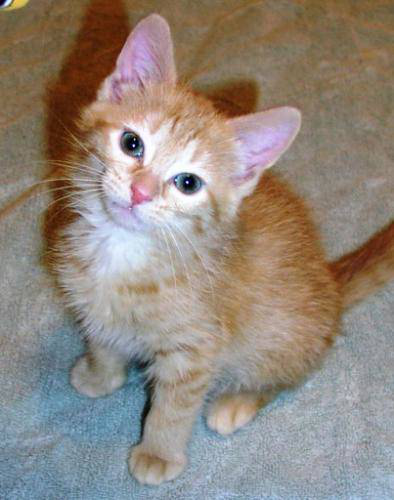

In [ ]:
img = open_image('imgs/cat_example.jpg')
img

To look at the picture that this [`Image`](/vision.image.html#Image) contains, you can also use its `show` method. It will show a resized version and has more options to customize the display.

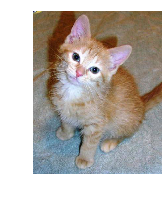

In [ ]:
img.show()

This `show` method can take a few arguments (see the documentation of [`Image.show`](/vision.image.html#Image.show) for details) but the two we will use the most in this documentation are:
- `ax` which is the [matplolib.pyplot axes](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html) on which we want to show the image
- `title` which is an optional title we can give to the image.

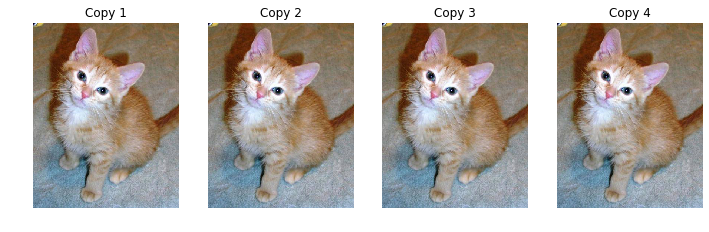

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')

If you're interested in the tensor of pixels, it's stored in the <code>data</code> attribute of an [`Image`](/vision.image.html#Image).

In [ ]:
img.data.shape

torch.Size([3, 500, 394])

## The Image classes

[`Image`](/vision.image.html#Image) is the class that wraps every picture in the fastai library. It is subclassed to create [`ImageSegment`](/vision.image.html#ImageSegment) and [`ImageBBox`](/vision.image.html#ImageBBox) when dealing with segmentation and object detection tasks. 

In [ ]:
show_doc(Image, title_level=3)

<h3 id="Image" class="doc_header"><code>class</code> <code>Image</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L62" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>Image</code>(**`px`**:`Tensor`) :: [`ItemBase`](/core.html#ItemBase)

<div class="collapse" id="Image-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>Image</code>:</p><ul><li><code>pytest -sv tests/test_vision_transform.py::test_mask_data_aug</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_transform.py#L58" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>Image</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_image_resize_same_size_shortcut</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L49" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Support applying transforms to image data in `px`.  

Most of the functions of the [`Image`](/vision.image.html#Image) class deal with the internal pipeline of transforms, so they are only shown at the end of this page. The easiest way to create one is through the function [`open_image`](/vision.image.html#open_image), as we saw before.

In [ ]:
show_doc(open_image)

<h4 id="open_image" class="doc_header"><code>open_image</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L388" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#open_image-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open_image</code>(**`fn`**:`PathOrStr`, **`div`**:`bool`=***`True`***, **`convert_mode`**:`str`=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***) → [`Image`](/vision.image.html#Image)

<div class="collapse" id="open_image-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#open_image-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>open_image</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Return [`Image`](/vision.image.html#Image) object created from image in file `fn`.  

If `div=True`, pixel values are divided by 255. to become floats between 0. and 1. `convert_mode` is passed to `PIL.Image.convert`.

**How many convert_mode does PIL offer?**

Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images. All official modes see the source code [here](https://github.com/python-pillow/Pillow/blob/d45a13d9cb11c3b89757720a330a9b725a2f9c46/src/PIL/Image.py#L270). With the following example, you can get a feel of how `open_image` working with different `convert_mode`.

In [ ]:
from fastai.vision import *

In [ ]:
path_data = untar_data(URLs.PLANET_TINY); path_data.ls()

[PosixPath('/Users/Natsume/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/Users/Natsume/.fastai/data/planet_tiny/train')]

In [ ]:
imagelistRGB = ImageList.from_folder(path_data/'train'); imagelistRGB

ImageList (200 items)
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /Users/Natsume/.fastai/data/planet_tiny/train

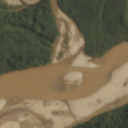

In [ ]:
imagelistRGB.convert_mode = 'RGB'
imagelistRGB.open(imagelistRGB.items[10])

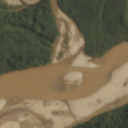

In [ ]:
mode = 'RGBA'
open_image(imagelistRGB.items[10],convert_mode=mode)

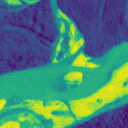

In [ ]:
mode = 'L'
open_image(imagelistRGB.items[10],convert_mode=mode)

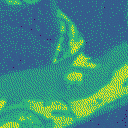

In [ ]:
mode = 'P'
open_image(imagelistRGB.items[10],convert_mode=mode)

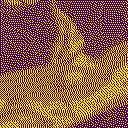

In [ ]:
mode = '1'
open_image(imagelistRGB.items[10],convert_mode=mode)

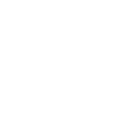

In [ ]:
mode = 'CMYK'
open_image(imagelistRGB.items[10],convert_mode=mode)

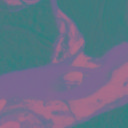

In [ ]:
mode = 'YCbCr'
open_image(imagelistRGB.items[10],convert_mode=mode)

As we saw, in a Jupyter Notebook, the representation of an [`Image`](/vision.image.html#Image) is its underlying picture (shown to its full size). On top of containing the tensor of pixels of the image (and automatically doing the conversion after decoding the image), this class contains various methods for the implementation of transforms. The [`Image.show`](/vision.image.html#Image.show) method also allows to pass more arguments:

In [ ]:
show_doc(Image.show, arg_comments ={
    'ax': 'matplotlib.pyplot axes on which show the image',
    'figsize': 'Size of the figure',
    'title': 'Title to display on top of the graph',
    'hide_axis': 'If True, the axis of the graph are hidden',
    'cmap': 'Color map to use',
    'y': 'Potential target to be superposed on the same graph (mask, bounding box, points)'
}, full_name='Image.show')

<h4 id="Image.show" class="doc_header"><code>Image.show</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L216" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-show-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>Image.show</code>(**`ax`**:`Axes`=***`None`***, **`figsize`**:`tuple`=***`(3, 3)`***, **`title`**:`Optional`\[`str`\]=***`None`***, **`hide_axis`**:`bool`=***`True`***, **`cmap`**:`str`=***`None`***, **`y`**:`Any`=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="Image-show-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-show-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show image on `ax` with `title`, using `cmap` if single-channel, overlaid with optional `y` 

- *ax*: matplotlib.pyplot axes on which show the image
- *figsize*: Size of the figure
- *title*: Title to display on top of the graph
- *hide_axis*: If True, the axis of the graph are hidden
- *cmap*: Color map to use
- *y*: Potential target to be superposed on the same graph (mask, bounding box, points) 

This allows us to completely customize the display of an [`Image`](/vision.image.html#Image). We'll see examples of the `y` functionality below with segmentation and bounding boxes tasks, for now here is an example using the other features.

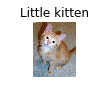

In [ ]:
img.show(figsize=(2, 1), title='Little kitten')

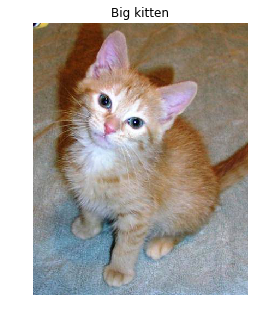

In [ ]:
img.show(figsize=(10,5), title='Big kitten')

With the following example, you will get a feel of how to set `cmap` for `Image.show`.

See matplotlib docs for `cmap` options [here](https://github.com/matplotlib/matplotlib/blob/master/tutorials/colors/colormaps.py#L117). This is how `defaults.cmap` is defined in `fastai`, see source [here](https://github.com/fastai/fastai/blob/7f31359d8fccf82587d984a99a6c6b07c6324fb0/fastai/core.py#L49).

```python
defaults = SimpleNamespace(cpus=_default_cpus, cmap='viridis', return_fig=False, silent=False)
```

In [ ]:
img.shape

torch.Size([3, 500, 394])

As `cmap` works on a single channel, so it is necessary to set `convert_mode='L'` so that the image channel will be shrinked to 1.

torch.Size([1, 500, 394])


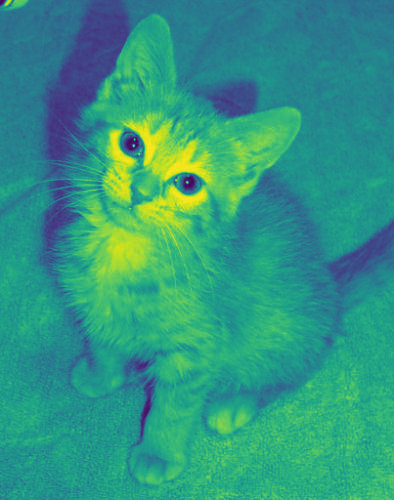

In [ ]:
img = open_image('imgs/cat_example.jpg', convert_mode='L'); print(img.shape)
img

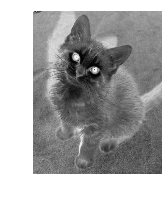

In [ ]:
img.show(cmap='binary')

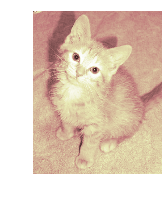

In [ ]:
img.show(cmap='pink')

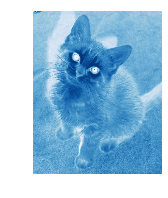

In [ ]:
defaults.cmap = 'Blues'
img.show()

An [`Image`](/vision.image.html#Image) object also has a few attributes that can be useful:
- `Image.data` gives you the underlying tensor of pixel
- `Image.shape` gives you the size of that tensor (channels x height x width)
- `Image.size` gives you the size of the image (height x width)

In [ ]:
img.data, img.shape, img.size

(tensor([[[0.1216, 0.0745, 0.0392,  ..., 0.4706, 0.4863, 0.4863],
          [0.0706, 0.0431, 0.0314,  ..., 0.4706, 0.4863, 0.4824],
          [0.0588, 0.0471, 0.0588,  ..., 0.4745, 0.4784, 0.4706],
          ...,
          [0.3059, 0.3647, 0.3686,  ..., 0.5412, 0.5725, 0.5725],
          [0.3294, 0.4000, 0.4039,  ..., 0.5882, 0.5765, 0.5765],
          [0.3843, 0.4627, 0.4667,  ..., 0.6471, 0.5725, 0.5725]],
 
         [[0.0235, 0.0000, 0.0000,  ..., 0.3451, 0.3725, 0.3725],
          [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3725, 0.3765],
          [0.0000, 0.0000, 0.0196,  ..., 0.3647, 0.3686, 0.3725],
          ...,
          [0.3882, 0.4588, 0.4627,  ..., 0.6471, 0.6784, 0.6784],
          [0.4118, 0.4941, 0.4980,  ..., 0.6941, 0.6824, 0.6824],
          [0.4667, 0.5569, 0.5608,  ..., 0.7529, 0.6784, 0.6784]],
 
         [[0.1098, 0.0941, 0.1137,  ..., 0.1843, 0.2078, 0.2078],
          [0.0784, 0.0784, 0.1216,  ..., 0.1922, 0.2078, 0.2078],
          [0.1098, 0.1176, 0.1647,  ...,

For a segmentation task, the target is usually a mask. The fastai library represents it as an [`ImageSegment`](/vision.image.html#ImageSegment) object.

In [ ]:
show_doc(ImageSegment, title_level=3)

<h3 id="ImageSegment" class="doc_header"><code>class</code> <code>ImageSegment</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L224" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageSegment-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ImageSegment</code>(**`px`**:`Tensor`) :: [`Image`](/vision.image.html#Image)

<div class="collapse" id="ImageSegment-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageSegment-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImageSegment</code>:</p><ul><li><code>pytest -sv tests/test_vision_transform.py::test_mask_data_aug</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_transform.py#L58" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Support applying transforms to segmentation masks data in `px`.  

To easily open a mask, the function [`open_mask`](/vision.image.html#open_mask) plays the same role as [`open_image`](/vision.image.html#open_image):

In [ ]:
show_doc(open_mask)

<h4 id="open_mask" class="doc_header"><code>open_mask</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L399" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#open_mask-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open_mask</code>(**`fn`**:`PathOrStr`, **`div`**=***`False`***, **`convert_mode`**=***`'L'`***, **`after_open`**:`Callable`=***`None`***) → [`ImageSegment`](/vision.image.html#ImageSegment)

<div class="collapse" id="open_mask-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#open_mask-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>open_mask</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Return [`ImageSegment`](/vision.image.html#ImageSegment) object create from mask in file `fn`. If `div`, divides pixel values by 255.  

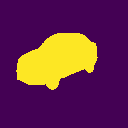

In [ ]:
open_mask('imgs/mask_example.png')

### Run length encoded masks

From time to time, you may encouter mask data as run lengh encoding string instead of picture.

In [ ]:
df = pd.read_csv('imgs/mask_rle_sample.csv')
encoded_str = df.iloc[1]['rle_mask']; 
df[:2]

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...


You can also read a mask in run length encoding, with an extra argument __shape__ for image size

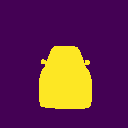

In [ ]:
mask = open_mask_rle(df.iloc[0]['rle_mask'], shape=(1918, 1280)).resize((1,128,128))
mask

In [ ]:
show_doc(open_mask_rle)

<h4 id="open_mask_rle" class="doc_header"><code>open_mask_rle</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L403" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#open_mask_rle-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open_mask_rle</code>(**`mask_rle`**:`str`, **`shape`**:`Tuple`\[`int`, `int`\]) → [`ImageSegment`](/vision.image.html#ImageSegment)

<div class="collapse" id="open_mask_rle-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#open_mask_rle-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>open_mask_rle</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Return [`ImageSegment`](/vision.image.html#ImageSegment) object create from run-length encoded string in `mask_lre` with size in `shape`.  

The [`open_mask_rle`](/vision.image.html#open_mask_rle) simply make use of the helper function [`rle_decode`](/vision.image.html#rle_decode) 

In [ ]:
rle_decode(encoded_str, (1912, 1280)).shape

(1912, 1280)

In [ ]:
show_doc(rle_decode)

<h4 id="rle_decode" class="doc_header"><code>rle_decode</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L416" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#rle_decode-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>rle_decode</code>(**`mask_rle`**:`str`, **`shape`**:`Tuple`\[`int`, `int`\]) → `ndarray`

<div class="collapse" id="rle_decode-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#rle_decode-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>rle_decode</code>:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_rle_decode_empty_str</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L23" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_image.py::test_rle_decode_with_str</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L17" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Return an image array from run-length encoded string `mask_rle` with `shape`.  

You can also convert [`ImageSegment`](/vision.image.html#ImageSegment) to run length encoding.

In [ ]:
type(mask)

fastai.vision.image.ImageSegment

In [ ]:
rle_encode(mask.data)

'5943 21 6070 25 6197 26 6324 28 6452 29 6579 30 6707 31 6835 31 6962 32 7090 33 7217 34 7345 35 7473 35 7595 2 7600 36 7722 5 7728 37 7766 4 7850 43 7894 5 7978 43 8022 5 8106 49 8238 44 8366 40 8494 41 8621 42 8748 44 8875 46 9003 47 9130 48 9258 49 9386 49 9513 50 9641 51 9769 51 9897 51 10024 52 10152 53 10280 53 10408 53 10536 53 10664 53 10792 53 10920 53 11048 53 11176 53 11304 53 11432 53 11560 53 11688 53 11816 53 11944 53 12072 53 12200 53 12328 53 12456 53 12584 53 12712 53 12840 53 12968 53 13097 51 13225 51 13353 51 13481 51 13610 49 13742 44 13880 30'

In [ ]:
show_doc(rle_encode)

<h4 id="rle_encode" class="doc_header"><code>rle_encode</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L409" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#rle_encode-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>rle_encode</code>(**`img`**:`ndarray`) → `str`

<div class="collapse" id="rle_encode-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#rle_encode-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>rle_encode</code>:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_rle_encode_all_zero_array</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L11" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_image.py::test_rle_encode_with_array</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L5" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Return run-length encoding string from `img`.  

An [`ImageSegment`](/vision.image.html#ImageSegment) object has the same properties as an [`Image`](/vision.image.html#Image). The only difference is that when applying the transformations to an [`ImageSegment`](/vision.image.html#ImageSegment), it will ignore the functions that deal with lighting and keep values of 0 and 1. As explained earlier, it's easy to show the segmentation mask over the associated [`Image`](/vision.image.html#Image) by using the `y` argument of [`show_image`](/vision.image.html#show_image).

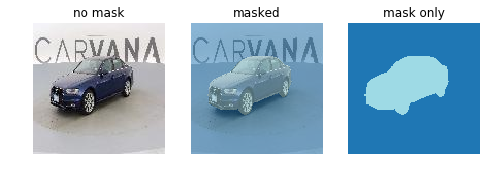

In [ ]:
img = open_image('imgs/car_example.jpg')
mask = open_mask('imgs/mask_example.png')
_,axs = plt.subplots(1,3, figsize=(8,4))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask, title='masked')
mask.show(ax=axs[2], title='mask only', alpha=1.)

When the targets are a bunch of points, the following class will help.

In [ ]:
show_doc(ImagePoints, title_level=3)

<h3 id="ImagePoints" class="doc_header"><code>class</code> <code>ImagePoints</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L246" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ImagePoints</code>(**`flow`**:[`FlowField`](/vision.image.html#FlowField), **`scale`**:`bool`=***`True`***, **`y_first`**:`bool`=***`True`***) :: [`Image`](/vision.image.html#Image)

<div class="collapse" id="ImagePoints-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImagePoints</code>:</p><ul><li><code>pytest -sv tests/test_vision_transform.py::test_points_data_aug</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_transform.py#L22" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Support applying transforms to a `flow` of points.  

Create an [`ImagePoints`](/vision.image.html#ImagePoints) object from a `flow` of coordinates. Coordinates need to be scaled to the range (-1,1) which will be done in the intialization if `scale` is left as `True`. Convention is to have point coordinates in the form `[y,x]` unless `y_first` is set to `False`.

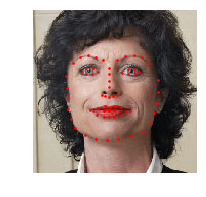

In [ ]:
img = open_image('imgs/face_example.jpg')
pnts = torch.load('points.pth')
pnts = ImagePoints(FlowField(img.size, pnts))
img.show(y=pnts)

Note that the raw points are gathered in a [`FlowField`](/vision.image.html#FlowField) object, which is a class that wraps together a bunch of coordinates with the corresponding image size. In fastai, we expect points to have the y coordinate first by default. The underlying data of `pnts` is the flow of points scaled from -1 to 1 (again with the y coordinate first):

In [ ]:
pnts.data[:10]

tensor([[-0.1875, -0.6000],
        [-0.0500, -0.5875],
        [ 0.0750, -0.5750],
        [ 0.2125, -0.5750],
        [ 0.3375, -0.5375],
        [ 0.4500, -0.4875],
        [ 0.5250, -0.3750],
        [ 0.5750, -0.2375],
        [ 0.5875, -0.1000],
        [ 0.5750,  0.0375]])

For an objection detection task, the target is a bounding box containg the picture.

In [ ]:
show_doc(ImageBBox, title_level=3)

<h3 id="ImageBBox" class="doc_header"><code>class</code> <code>ImageBBox</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L333" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageBBox-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ImageBBox</code>(**`flow`**:[`FlowField`](/vision.image.html#FlowField), **`scale`**:`bool`=***`True`***, **`y_first`**:`bool`=***`True`***, **`labels`**:`Collection`\[`T_co`\]=***`None`***, **`classes`**:`dict`=***`None`***, **`pad_idx`**:`int`=***`0`***) :: [`ImagePoints`](/vision.image.html#ImagePoints)

<div class="collapse" id="ImageBBox-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageBBox-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImageBBox</code>:</p><ul><li><code>pytest -sv tests/test_vision_transform.py::test_bbox_data_aug</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_transform.py#L37" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Support applying transforms to a `flow` of bounding boxes.  

Create an [`ImageBBox`](/vision.image.html#ImageBBox) object from a `flow` of coordinates. Those coordinates are expected to be in a [`FlowField`](/vision.image.html#FlowField) with an underlying flow of size 4N, if we have N bboxes, describing for each box the top left, top right, bottom left, bottom right corners. Coordinates need to be scaled to the range (-1,1) which will be done in the intialization if `scale` is left as `True`. Convention is to have point coordinates in the form `[y,x]` unless `y_first` is set to `False`. `labels` is an optional collection of labels, which should be the same size as `flow`. `pad_idx` is used if the set of transform somehow leaves the image without any bounding boxes.

To create an [`ImageBBox`](/vision.image.html#ImageBBox), you can use the `create` helper function that takes a list of bounding boxes, the height of the input image, and the width of the input image. Each bounding box is represented by a list of four numbers: the coordinates of the corners of the box with the following convention: top, left, bottom, right. 

In [ ]:
show_doc(ImageBBox.create, arg_comments={
    'h': 'height of the input image',
    'w': 'width of the input image',
    'bboxes': 'list of bboxes (each of those being four integers with the top, left, bottom, right convention)',
    'labels': 'labels of the images (as indexes)',
    'classes': 'the corresponding classes',
    'pad_idx': 'padding index that will be used to group the ImageBBox in a batch',
    'scale': 'if `True`, will scale the bounding boxes from -1 to 1'
})

<h4 id="ImageBBox.create" class="doc_header"><code>create</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L348" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageBBox-create-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>create</code>(**`h`**:`int`, **`w`**:`int`, **`bboxes`**:`Collection`\[`Collection`\[`int`\]\], **`labels`**:`Collection`\[`T_co`\]=***`None`***, **`classes`**:`dict`=***`None`***, **`pad_idx`**:`int`=***`0`***, **`scale`**:`bool`=***`True`***) → `ImageBBox`

<div class="collapse" id="ImageBBox-create-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageBBox-create-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>create</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create an ImageBBox object from `bboxes`. 

- *h*: height of the input image
- *w*: width of the input image
- *bboxes*: list of bboxes (each of those being four integers with the top, left, bottom, right convention)
- *labels*: labels of the images (as indexes)
- *classes*: the corresponding classes
- *pad_idx*: padding index that will be used to group the ImageBBox in a batch
- *scale*: if `True`, will scale the bounding boxes from -1 to 1 

We need to pass the dimensions of the input image so that [`ImageBBox`](/vision.image.html#ImageBBox) can internally create the [`FlowField`](/vision.image.html#FlowField). Again, the [`Image.show`](/vision.image.html#Image.show) method will display the bounding box on the same image if it's passed as a `y` argument.

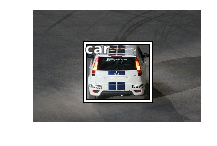

In [ ]:
img = open_image('imgs/car_bbox.jpg')
bbox = ImageBBox.create(*img.size, [[96, 155, 270, 351]], labels=[0], classes=['car'])
img.show(y=bbox)

To help with the conversion of images or to show them, we use these helper functions:

In [ ]:
show_doc(show_image)

<h4 id="show_image" class="doc_header"><code>show_image</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L426" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#show_image-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_image</code>(**`img`**:[`Image`](/vision.image.html#Image), **`ax`**:`Axes`=***`None`***, **`figsize`**:`tuple`=***`(3, 3)`***, **`hide_axis`**:`bool`=***`True`***, **`cmap`**:`str`=***`'binary'`***, **`alpha`**:`float`=***`None`***, **\*\*`kwargs`**) → `Axes`

<div class="collapse" id="show_image-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#show_image-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_image</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Display [`Image`](/vision.image.html#Image) in notebook.  

In [ ]:
show_doc(pil2tensor)

<h4 id="pil2tensor" class="doc_header"><code>pil2tensor</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L14" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#pil2tensor-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>pil2tensor</code>(**`image`**:`ndarray`, **`dtype`**:`dtype`) → `Tensor`

<div class="collapse" id="pil2tensor-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#pil2tensor-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>pil2tensor</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L348" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor_16bit</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L379" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor_numpy</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L386" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Convert PIL style `image` array to torch style image tensor.  

In [ ]:
pil2tensor(PIL.Image.open('imgs/cat_example.jpg').convert("RGB"), np.float32).div_(255).size() 

torch.Size([3, 500, 394])

In [ ]:
pil2tensor(PIL.Image.open('imgs/cat_example.jpg').convert("I"), np.float32).div_(255).size()

torch.Size([1, 500, 394])

In [ ]:
pil2tensor(PIL.Image.open('imgs/mask_example.png').convert("L"), np.float32).div_(255).size()

torch.Size([1, 128, 128])

In [ ]:
pil2tensor(np.random.rand(224,224,3).astype(np.float32), np.float32).size()

torch.Size([3, 224, 224])

In [ ]:
pil2tensor(PIL.Image.open('imgs/cat_example.jpg'), np.float32).div_(255).size()

torch.Size([3, 500, 394])

In [ ]:
pil2tensor(PIL.Image.open('imgs/mask_example.png'), np.float32).div_(255).size()

torch.Size([1, 128, 128])

In [ ]:
show_doc(image2np)

<h4 id="image2np" class="doc_header"><code>image2np</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L22" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#image2np-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>image2np</code>(**`image`**:`Tensor`) → `ndarray`

<div class="collapse" id="image2np-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#image2np-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>image2np</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Convert from torch style `image` to numpy/matplotlib style.  

In [ ]:
show_doc(scale_flow)

<h4 id="scale_flow" class="doc_header"><code>scale_flow</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L434" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#scale_flow-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>scale_flow</code>(**`flow`**, **`to_unit`**=***`True`***)

<div class="collapse" id="scale_flow-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#scale_flow-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>scale_flow</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Scale the coords in `flow` to -1/1 or the image size depending on `to_unit`.  

In [ ]:
show_doc(bb2hw)

<h4 id="bb2hw" class="doc_header"><code>bb2hw</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L27" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#bb2hw-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>bb2hw</code>(**`a`**:`Collection`\[`int`\]) → `ndarray`

<div class="collapse" id="bb2hw-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#bb2hw-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>bb2hw</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Convert bounding box points from (width,height,center) to (height,width,top,left).  

In [ ]:
show_doc(tis2hw)

<h4 id="tis2hw" class="doc_header"><code>tis2hw</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L31" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#tis2hw-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>tis2hw</code>(**`size`**:`Union`\[`int`, `TensorImageSize`\]) → `Tuple`\[`int`, `int`\]

<div class="collapse" id="tis2hw-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#tis2hw-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>tis2hw</code>:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_tis2hw_2dims</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L39" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_image.py::test_tis2hw_3dims</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L34" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_image.py::test_tis2hw_int</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L29" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_image.py::test_tis2hw_str_raises_an_error</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L44" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Convert `int` or `TensorImageSize` to (height,width) of an image.  

If a size is provided as `(int, int)`, [`tis2hw`](/vision.image.html#tis2hw) will return it as it is. If a size is passed in as `str`, [`tis2hw`](/vision.image.html#tis2hw) will raise a `RuntimeError`

## Visualization functions

In [ ]:
show_doc(show_all)

<h4 id="show_all" class="doc_header"><code>show_all</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L616" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#show_all-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_all</code>(**`imgs`**:`Collection`\[[`Image`](/vision.image.html#Image)\], **`r`**:`int`=***`1`***, **`c`**:`Optional`\[`int`\]=***`None`***, **`figsize`**=***`(12, 6)`***)

<div class="collapse" id="show_all-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#show_all-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_all</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show all `imgs` using `r` rows  

In [ ]:
show_doc(plot_flat)

<h4 id="plot_flat" class="doc_header"><code>plot_flat</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L602" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#plot_flat-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>plot_flat</code>(**`r`**, **`c`**, **`figsize`**)

<div class="collapse" id="plot_flat-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#plot_flat-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>plot_flat</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Shortcut for `enumerate(subplots.flatten())`  

In [ ]:
show_doc(plot_multi)

<h4 id="plot_multi" class="doc_header"><code>plot_multi</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L606" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#plot_multi-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>plot_multi</code>(**`func`**:`Callable`\[`int`, `int`, `Axes`, `NoneType`\], **`r`**:`int`=***`1`***, **`c`**:`int`=***`1`***, **`figsize`**:`Tuple`=***`(12, 6)`***)

<div class="collapse" id="plot_multi-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#plot_multi-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>plot_multi</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Call `func` for every combination of `r,c` on a subplot  

In [ ]:
show_doc(show_multi)

<h4 id="show_multi" class="doc_header"><code>show_multi</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L612" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#show_multi-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_multi</code>(**`func`**:`Callable`\[`int`, `int`, [`Image`](/vision.image.html#Image)\], **`r`**:`int`=***`1`***, **`c`**:`int`=***`1`***, **`figsize`**:`Tuple`=***`(9, 9)`***)

<div class="collapse" id="show_multi-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#show_multi-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_multi</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Call `func(i,j).show(ax)` for every combination of `r,c`  

## Applying transforms

All the transforms available for data augmentation in computer vision are defined in the [vision.transform](vision.transform.ipynb) module. When we want to apply them to an [`Image`](/vision.image.html#Image), we use this method:

In [ ]:
show_doc(Image.apply_tfms, arg_comments={
    'tfms': '`Transform` or list of `Transform`',
    'do_resolve': 'if False, the values of random parameters are kept from the last draw',
    'xtra': 'extra arguments to pass to the transforms',
    'size': 'desired target size',
    'mult': 'makes sure the final size is a multiple of mult',
    'resize_method': 'how to get to the final size (crop, pad, squish)',
    'padding_mode': "how to pad the image ('zeros', 'border', 'reflection')"
})

<h4 id="Image.apply_tfms" class="doc_header"><code>apply_tfms</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L96" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-apply_tfms-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>apply_tfms</code>(**`tfms`**:`Union`\[`Callable`, `Collection`\[`Callable`\]\], **`do_resolve`**:`bool`=***`True`***, **`xtra`**:`Optional`\[`Dict`\[`Callable`, `dict`\]\]=***`None`***, **`size`**:`Union`\[`int`, `TensorImageSize`, `NoneType`\]=***`None`***, **`resize_method`**:[`ResizeMethod`](/vision.image.html#ResizeMethod)=***`None`***, **`mult`**:`int`=***`None`***, **`padding_mode`**:`str`=***`'reflection'`***, **`mode`**:`str`=***`'bilinear'`***, **`remove_out`**:`bool`=***`True`***) → `Tensor`

<div class="collapse" id="Image-apply_tfms-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-apply_tfms-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>apply_tfms</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Apply all `tfms` to the [`Image`](/vision.image.html#Image), if `do_resolve` picks value for random args. 

- *tfms*: `Transform` or list of `Transform`
- *do_resolve*: if False, the values of random parameters are kept from the last draw
- *xtra*: extra arguments to pass to the transforms
- *size*: desired target size
- *mult*: makes sure the final size is a multiple of mult
- *resize_method*: how to get to the final size (crop, pad, squish)
- *padding_mode*: how to pad the image ('zeros', 'border', 'reflection') 

Before showing examples, let's take a few moments to comment those arguments a bit more:
- `do_resolve` decides if we resolve the random arguments by drawing new numbers or not. The intended use is to have the `tfms` applied to the input `x` with `do_resolve`=True, then, if the target `y` needs to be applied data augmentation (if it's a segmentation mask or bounding box), apply the `tfms` to `y` with `do_resolve`=False.
- `mult` default value is very important to make sure your image can pass through most recent CNNs: they divide the size of the input image by 2 multiple times so both dimensions of your picture should be mutliples of at least 32. Only change the value of this parameter if you know it will be accepted by your model.

Here are a few helper functions to help us load the examples we saw before.

In [ ]:
def get_class_ex(): return open_image('imgs/cat_example.jpg')
def get_seg_ex(): return open_image('imgs/car_example.jpg'), open_mask('imgs/mask_example.png')
def get_pnt_ex():
    img = open_image('imgs/face_example.jpg')
    pnts = torch.load('points.pth')
    return img, ImagePoints(FlowField(img.size, pnts))
def get_bb_ex():
    img = open_image('imgs/car_bbox.jpg')
    return img, ImageBBox.create(*img.size, [[96, 155, 270, 351]], labels=[0], classes=['car'])

Now let's grab our usual bunch of transforms and see what they do.

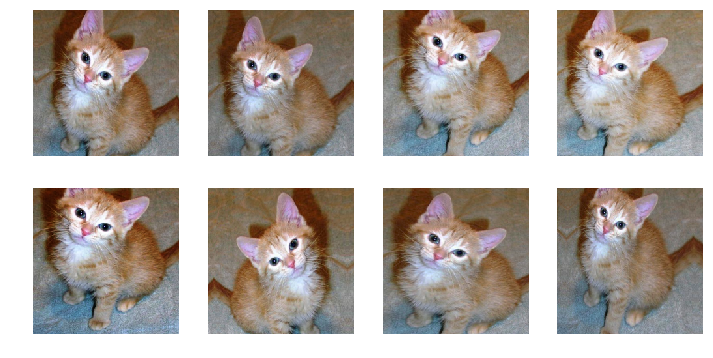

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_class_ex().apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)

Now let's check what it gives for a segmentation task. Note that, as instructed by the documentation of [`apply_tfms`](/vision.image.html#Image.apply_tfms), we first apply the transforms to the input, and then apply them to the target while adding `do_resolve`=False.

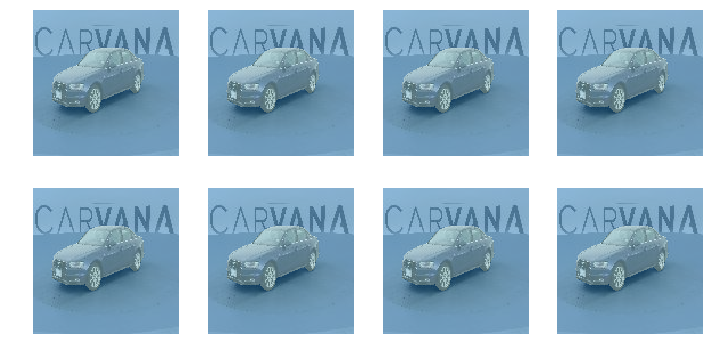

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,mask = get_seg_ex()
    img = img.apply_tfms(tfms[0], size=224)
    mask = mask.apply_tfms(tfms[0], do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

Internally, each *transforms* saves the values it randomly picked into a dictionary called *resolved*, which it can reuse for the target.

In [ ]:
tfms[0][4]

RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={'row_pct': 0.8593230459662604, 'col_pct': 0.27498721638860113, 'scale': 1.0112683952771075}, do_run=False, is_random=True)

For points, [`ImagePoints`](/vision.image.html#ImagePoints) will apply the transforms to the coordinates.

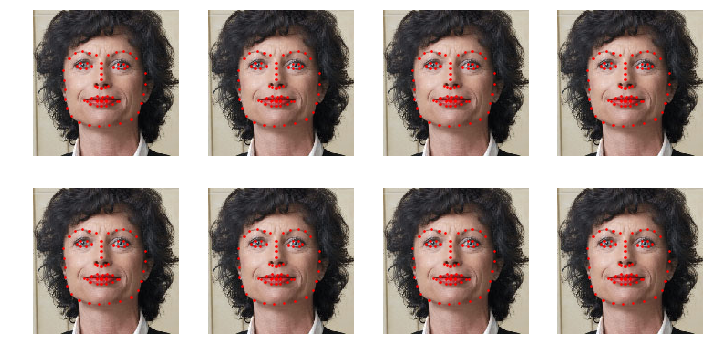

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,pnts = get_pnt_ex()
    img = img.apply_tfms(tfms[0], size=224)
    pnts = pnts.apply_tfms(tfms[0], do_resolve=False, size=224)
    img.show(ax=ax, y=pnts)

Now for the bounding box, the [`ImageBBox`](/vision.image.html#ImageBBox) will automatically update the coordinates of the two opposite corners in its data attribute.

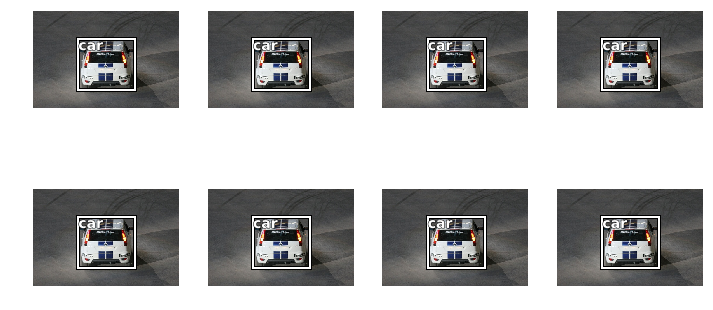

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,bbox = get_bb_ex()
    img = img.apply_tfms(tfms[0], size=224)
    bbox = bbox.apply_tfms(tfms[0], do_resolve=False, size=224)
    img.show(ax=ax, y=bbox)

## Fastai internal pipeline

### What does a transform do?

Typically, a data augmentation operation will randomly modify an image input. This operation can apply to pixels (when we modify the contrast or brightness for instance) or to coordinates (when we do a rotation, a zoom or a resize). The operations that apply to pixels can easily be coded in numpy/pytorch, directly on an array/tensor but the ones that modify the coordinates are a bit more tricky.

They usually come in three steps: first we create a grid of coordinates for our picture: this is an array of size `h * w * 2` (`h` for height, `w` for width in the rest of this post) that contains in position i,j two floats representing the position of the pixel (i,j) in the picture. They could simply be the integers i and j, but since most transformations are centered with the center of the picture as origin, they’re usually rescaled to go from -1 to 1, (-1,-1) being the top left corner of the picture, (1,1) the bottom right corner (and (0,0) the center), and this can be seen as a regular grid of size h * w. Here is a what our grid would look like for a 5px by 5px image.

<img src="imgs/grid.png" alt="Example of grid" width="200">

Then, we apply the transformation to modify this grid of coordinates. For instance, if we want to apply an affine transformation (like a rotation) we will transform each of those vectors `x` of size 2 by `A @ x + b` at every position in the grid. This will give us the new coordinates, as seen here in the case of our previous grid.

<img src="imgs/grid_rot.png" alt="Example of grid rotated" width="300">

There are two problems that arise after the transformation: the first one is that the pixel values won’t fall exactly on the grid, and the other is that we can get values that get out of the grid (one of the coordinates is greater than 1 or lower than -1).

To solve the first problem, we use an interpolation. If we forget the rescale for a minute and go back to coordinates being integers, the result of our transformation gives us float coordinates, and we need to decide, for each (i,j), which pixel value in the original picture we need to take. The most basic interpolation called nearest neighbor would just round the floats and take the nearest integers. If we think in terms of the grid of coordinates (going from -1 to 1), the result of our transformation gives a point that isn’t in the grid, and we replace it by its nearest neighbor in the grid.

To be smarter, we can perform a [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation). This takes an average of the values of the pixels corresponding to the four points in the grid surrounding the result of our transformation, with weights depending on how close we are to each of those points. This comes at a computational cost though, so this is where we have to be careful.

As for the values that go out of the picture, we treat them by padding it either:
- by adding zeros on the side, so the pixels that fall out will be black (zero padding)
- by replacing them by the value at the border (border padding)
- by mirroring the content of the picture on the other side (reflection padding).

### Be smart and efficient

Usually, data augmentation libraries have separated the different operations. So for a resize, we’ll go through the three steps above, then if we do a random rotation, we’ll go again to do those steps, then for a zoom etc... The fastai library works differently in the sense that it will do all the transformations on the coordinates at the same time, so that we only do those three steps once, especially the last one (the interpolation) is the most heavy in computation.

The first thing is that we can regroup all affine transforms in just one pass (because an affine transform composed by an affine transform is another affine transform). This is already done in some other libraries but we pushed it one step further. We integrated the resize, the crop and any non-affine transformation of the coordinates in the same process. Let’s dig in!

- In step 1, when we create the grid, we use the new size we want for our image, so `new_h, new_w` (and not `h, w`). This takes care of the resize operation.
- In step 2, we do only one affine transformation, by multiplying all the affine matrices of the transforms we want to do beforehand (those are 3 by 3 matrices, so it’s super fast). Then we apply to the coordinates any non-affine transformation we might want (jitter, perspective wrappin, etc) before...
- Step 2.5: we crop (either center or randomly) the coordinates we want to keep. Cropping could have been done at any point, but by doing it just before the interpolation, we don’t compute pixel values that won’t be used at the end, gaining again a bit of efficiency
- Finally step 3: the final interpolation. Afterward, we can apply on the picture all the tranforms that operate pixel-wise (brightness or contrast for instance) and we’re done with data augmentation.

Note that the transforms operating on pixels are applied in two phases:
- first the transforms that deal with lighting properties are applied to the logits of the pixels. We group them together so we only need to do the *conversion pixels -> logits -> pixels* transformation once.
- then we apply the transforms that modify the pixel.

This is why all transforms have an attribute (such as [`TfmAffine`](/vision.image.html#TfmAffine), [`TfmCoord`](/vision.image.html#TfmCoord), [`TfmCrop`](/vision.image.html#TfmCrop) or [`TfmPixel`](/vision.image.html#TfmPixel)) so that the fastai library can regroup them and apply them all together at the right step. In terms of implementation:

- [`_affine_grid`](https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L532) is reponsible for creating the grid of coordinates
- [`_affine_mult`](https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L542) is in charge of doing the affine multiplication on that grid
- [`_grid_sample`](https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L519)is the function that is responsible for the interpolation step

### Final result

TODO: add a comparison of speeds.

Adding a new transformation doesn't impact performance much (since the costly steps are done only once). In contrast with other libraries with classic data augmentation implementations, augmentation usually result in a longer training time.

In terms of final result, doing only one interpolation also gives a better result. If we stack several transforms and do an interpolation on each one, we approximate the true value of our coordinates in some way. This tends to blur the image a bit, which often negatively affects performance. By regrouping all the transformations together and only doing this step at the end, the image is often less blurry and the model often performs better.

See how the same rotation then zoom done separately (so there are two interpolations):

<img src="imgs/two_interpol.png" alt="Image interpolated twice" width="300">

is blurrier than regrouping the transforms and doing just one interpolation:

<img src="imgs/one_interpol.png" alt="Image interpolated once" width="300">

In [ ]:
show_doc(ResizeMethod, doc_string=False, title_level=3)

<h3 id="ResizeMethod" class="doc_header">`ResizeMethod`<a class="source_link" data-toggle="collapse" data-target="#ResizeMethod-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>Enum</code> = [CROP, PAD, SQUISH, NO]

<div class="collapse" id="ResizeMethod-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ResizeMethod-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>ResizeMethod</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Resize methods to transform an image to a given size:
- crop: resize so that the image fits in the desired canvas on its smaller side and crop
- pad: resize so that the image fits in the desired canvas on its bigger side and crop
- squish: resize theimage by squishing it in the desired canvas
- np: doesn't resize the image

## Transform classes

The basic class that defines transformation in the fastai library is [`Transform`](/vision.image.html#Transform). 

In [ ]:
show_doc(Transform, title_level=3, 
         alt_doc_string="Create a `Transform` for `func` and assign it a priority `order`.")

<h3 id="Transform" class="doc_header"><code>class</code> <code>Transform</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L446" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>Transform</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***)

<div class="collapse" id="Transform-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>Transform</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create a [`Transform`](/vision.image.html#Transform) for `func` and assign it a priority `order`. 

In [ ]:
show_doc(RandTransform, title_level=3)

<h3 id="RandTransform" class="doc_header"><code>class</code> <code>RandTransform</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L478" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#RandTransform-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>RandTransform</code>(**`tfm`**:[`Transform`](/vision.image.html#Transform), **`kwargs`**:`dict`, **`p`**:`float`=***`1.0`***, **`resolved`**:`dict`=***`<factory>`***, **`do_run`**:`bool`=***`True`***, **`is_random`**:`bool`=***`True`***, **`use_on_y`**:`bool`=***`True`***)

<div class="collapse" id="RandTransform-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#RandTransform-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>RandTransform</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Wrap [`Transform`](/vision.image.html#Transform) to add randomized execution.  

Each argument of `func` in kwargs is analyzed and if it has a type annotaiton that is a random function, this function will be called to pick a value for it. This value will be stored in the `resolved` dictionary. Following the same idea, `p` is the probability for func to be called and `do_run` will be set to True if it was the cause, False otherwise. Setting `is_random` to False allows to send specific values for each parameter. `use_on_y` is a parameter to further control transformations for targets (e.g. Segmentation Masks). Assuming transformations on labels are turned on using `tfm_y=True` (in your Data Blocks pipeline), `use_on_y=False` can disable the transformation for labels. 

In [ ]:
show_doc(RandTransform.resolve)

<h4 id="RandTransform.resolve" class="doc_header"><code>resolve</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L489" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#RandTransform-resolve-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>resolve</code>()

<div class="collapse" id="RandTransform-resolve-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#RandTransform-resolve-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>resolve</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Bind any random variables in the transform.  

To handle internally the data augmentation as explained earlier, each [`Transform`](/vision.image.html#Transform) as a type, so that the fastai library can regoup them together efficiently. There are five types of [`Transform`](/vision.image.html#Transform) which all work as decorators for a deterministic function.

In [ ]:
show_doc(TfmAffine, title_level=3)

<h3 id="TfmAffine" class="doc_header"><code>class</code> <code>TfmAffine</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L569" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TfmAffine-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>TfmAffine</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***) :: [`Transform`](/vision.image.html#Transform)

<div class="collapse" id="TfmAffine-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TfmAffine-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TfmAffine</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Decorator for affine tfm funcs.  

`func` should return the 3 by 3 matrix representing the transform. The default `order` is 5 for such transforms.

In [ ]:
show_doc(TfmCoord, title_level=3)

<h3 id="TfmCoord" class="doc_header"><code>class</code> <code>TfmCoord</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L575" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TfmCoord-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>TfmCoord</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***) :: [`Transform`](/vision.image.html#Transform)

<div class="collapse" id="TfmCoord-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TfmCoord-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TfmCoord</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Decorator for coord tfm funcs.  

`func` should take two mandatory arguments: `c` (the flow of coordinate) and `img_size` (the size of the corresponding image) and return the modified flow of coordinates. The default `order` is 4 for such transforms.

In [ ]:
show_doc(TfmLighting, title_level=3)

<h3 id="TfmLighting" class="doc_header"><code>class</code> <code>TfmLighting</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L581" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TfmLighting-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>TfmLighting</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***) :: [`Transform`](/vision.image.html#Transform)

<div class="collapse" id="TfmLighting-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TfmLighting-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TfmLighting</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Decorator for lighting tfm funcs.  

`func` takes the logits of the pixel tensor and changes them. The default `order` is 8 for such transforms.

In [ ]:
show_doc(TfmPixel, title_level=3)

<h3 id="TfmPixel" class="doc_header"><code>class</code> <code>TfmPixel</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L572" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TfmPixel-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>TfmPixel</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***) :: [`Transform`](/vision.image.html#Transform)

<div class="collapse" id="TfmPixel-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TfmPixel-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TfmPixel</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Decorator for pixel tfm funcs.  

`func` takes the pixel tensor and modifies it. The default `order` is 10 for such transforms.

In [ ]:
show_doc(TfmCrop, title_level=3)

<h3 id="TfmCrop" class="doc_header"><code>class</code> <code>TfmCrop</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L578" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TfmCrop-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>TfmCrop</code>(**`func`**:`Callable`, **`order`**:`Optional`\[`int`\]=***`None`***) :: [`TfmPixel`](/vision.image.html#TfmPixel)

<div class="collapse" id="TfmCrop-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TfmCrop-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TfmCrop</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Decorator for crop tfm funcs.  

This is a special case of [`TfmPixel`](/vision.image.html#TfmPixel) with `order` set to 99.

## Internal funcitons of the Image classes

All the [`Image`](/vision.image.html#Image) classes have the same internal functions that deal with data augmentation.

In [ ]:
show_doc(Image.affine)

<h4 id="Image.affine" class="doc_header"><code>affine</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L180" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-affine-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>affine</code>(**`func`**:`AffineFunc`, **\*`args`**, **\*\*`kwargs`**) → `Image`

<div class="collapse" id="Image-affine-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-affine-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>affine</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image.affine_mat = image.affine_mat @ func()`.  

In [ ]:
show_doc(Image.clone)

<h4 id="Image.clone" class="doc_header"><code>clone</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L76" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-clone-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>clone</code>()

<div class="collapse" id="Image-clone-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-clone-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>clone</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Mimic the behavior of torch.clone for [`Image`](/vision.image.html#Image) objects.  

In [ ]:
show_doc(Image.coord)

<h4 id="Image.coord" class="doc_header"><code>coord</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L175" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-coord-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>coord</code>(**`func`**:`Callable`\[[`FlowField`](/vision.image.html#FlowField), `ArgStar`, `KWArgs`, `Tensor`\], **\*`args`**, **\*\*`kwargs`**) → `Image`

<div class="collapse" id="Image-coord-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-coord-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>coord</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image.flow = func(image.flow, image.size)`.  

In [ ]:
show_doc(Image.lighting)

<h4 id="Image.lighting" class="doc_header"><code>lighting</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L165" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-lighting-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>lighting</code>(**`func`**:`LightingFunc`, **\*`args`**:`Any`, **\*\*`kwargs`**:`Any`)

<div class="collapse" id="Image-lighting-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-lighting-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>lighting</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image = sigmoid(func(logit(image)))`.  

In [ ]:
show_doc(Image.pixel)

<h4 id="Image.pixel" class="doc_header"><code>pixel</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L170" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-pixel-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>pixel</code>(**`func`**:`LightingFunc`, **\*`args`**, **\*\*`kwargs`**) → `Image`

<div class="collapse" id="Image-pixel-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-pixel-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>pixel</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image.px = func(image.px)`.  

In [ ]:
show_doc(Image.refresh)

<h4 id="Image.refresh" class="doc_header"><code>refresh</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L126" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-refresh-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>refresh</code>()

<div class="collapse" id="Image-refresh-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-refresh-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>refresh</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Apply any logit, flow, or affine transfers that have been sent to the [`Image`](/vision.image.html#Image).  

In [ ]:
show_doc(Image.resize)

<h4 id="Image.resize" class="doc_header"><code>resize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L186" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-resize-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>resize</code>(**`size`**:`Union`\[`int`, `TensorImageSize`\]) → `Image`

<div class="collapse" id="Image-resize-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-resize-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>resize</code>:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_image_resize_same_size_shortcut</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L49" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Resize the image to `size`, size can be a single int.  

In [ ]:
show_doc(Image.save)

<h4 id="Image.save" class="doc_header"><code>save</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L137" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-save-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>save</code>(**`fn`**:`PathOrStr`)

<div class="collapse" id="Image-save-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-save-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>save</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Save the image to `fn`.  

In [ ]:
show_doc(FlowField, title_level=3)

<h3 id="FlowField" class="doc_header"><code>class</code> <code>FlowField</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L55" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#FlowField-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>FlowField</code>(**`size`**:`Tuple`\[`int`, `int`\], **`flow`**:`Tensor`)

<div class="collapse" id="FlowField-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FlowField-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>FlowField</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Wrap together some coords `flow` with a `size`.  

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(Image.crop_pad)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.contrast)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.brightness)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.flip_lr)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.pad)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.pixel)

<h4 id="Image.pixel" class="doc_header"><code>pixel</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L170" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-pixel-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>pixel</code>(**`func`**:`LightingFunc`, **\*`args`**, **\*\*`kwargs`**) → `Image`

<div class="collapse" id="Image-pixel-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-pixel-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>pixel</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image.px = func(image.px)`.  

In [ ]:
show_doc(Image.zoom)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.dihedral)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(ImageSegment.refresh)

<h4 id="ImageSegment.refresh" class="doc_header"><code>refresh</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L228" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageSegment-refresh-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>refresh</code>()

<div class="collapse" id="ImageSegment-refresh-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageSegment-refresh-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>refresh</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Apply any logit, flow, or affine transfers that have been sent to the [`Image`](/vision.image.html#Image).  

In [ ]:
show_doc(Image.jitter)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.squish)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.skew)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.perspective_warp)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.zoom_squish)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.crop)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.tilt)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.rotate)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(ImageSegment.lighting)

<h4 id="ImageSegment.lighting" class="doc_header"><code>lighting</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L226" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageSegment-lighting-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>lighting</code>(**`func`**:`LightingFunc`, **\*`args`**:`Any`, **\*\*`kwargs`**:`Any`) → `Image`

<div class="collapse" id="ImageSegment-lighting-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageSegment-lighting-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>lighting</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image = sigmoid(func(logit(image)))`.  

In [ ]:
show_doc(Image.symmetric_warp)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.dihedral_affine)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(ImagePoints.pixel)

<h4 id="ImagePoints.pixel" class="doc_header"><code>pixel</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L299" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-pixel-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>pixel</code>(**`func`**:`LightingFunc`, **\*`args`**, **\*\*`kwargs`**) → `ImagePoints`

<div class="collapse" id="ImagePoints-pixel-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-pixel-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>pixel</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `self = func_flow(self)`.  

In [ ]:
show_doc(ImageBBox.clone)

<h4 id="ImageBBox.clone" class="doc_header"><code>clone</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L343" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageBBox-clone-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>clone</code>() → `ImageBBox`

<div class="collapse" id="ImageBBox-clone-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageBBox-clone-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>clone</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Mimic the behavior of torch.clone for [`Image`](/vision.image.html#Image) objects.  

In [ ]:
show_doc(ImagePoints.refresh)

<h4 id="ImagePoints.refresh" class="doc_header"><code>refresh</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L305" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-refresh-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>refresh</code>() → `ImagePoints`

<div class="collapse" id="ImagePoints-refresh-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-refresh-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>refresh</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Apply any logit, flow, or affine transfers that have been sent to the [`Image`](/vision.image.html#Image).  

In [ ]:
show_doc(ImagePoints.coord)

<h4 id="ImagePoints.coord" class="doc_header"><code>coord</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L290" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-coord-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>coord</code>(**`func`**:`Callable`\[[`FlowField`](/vision.image.html#FlowField), `ArgStar`, `KWArgs`, `Tensor`\], **\*`args`**, **\*\*`kwargs`**) → `ImagePoints`

<div class="collapse" id="ImagePoints-coord-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-coord-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>coord</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Put `func` with `args` and `kwargs` in `self.flow_func` for later.  

In [ ]:
show_doc(Image.set_sample)

<h4 id="Image.set_sample" class="doc_header"><code>set_sample</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L71" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Image-set_sample-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>set_sample</code>(**\*\*`kwargs`**) → `ImageBase`

<div class="collapse" id="Image-set_sample-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Image-set_sample-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>set_sample</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Set parameters that control how we `grid_sample` the image after transforms are applied.  

In [ ]:
show_doc(ImageSegment.show)

<h4 id="ImageSegment.show" class="doc_header"><code>show</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L237" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageSegment-show-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show</code>(**`ax`**:`Axes`=***`None`***, **`figsize`**:`tuple`=***`(3, 3)`***, **`title`**:`Optional`\[`str`\]=***`None`***, **`hide_axis`**:`bool`=***`True`***, **`cmap`**:`str`=***`'tab20'`***, **`alpha`**:`float`=***`0.5`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageSegment-show-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageSegment-show-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show the [`ImageSegment`](/vision.image.html#ImageSegment) on `ax`.  

In [ ]:
show_doc(ImagePoints.show)

<h4 id="ImagePoints.show" class="doc_header"><code>show</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L324" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-show-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show</code>(**`ax`**:`Axes`=***`None`***, **`figsize`**:`tuple`=***`(3, 3)`***, **`title`**:`Optional`\[`str`\]=***`None`***, **`hide_axis`**:`bool`=***`True`***, **\*\*`kwargs`**)

<div class="collapse" id="ImagePoints-show-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-show-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show the [`ImagePoints`](/vision.image.html#ImagePoints) on `ax`.  

In [ ]:
show_doc(ImagePoints.clone)

<h4 id="ImagePoints.clone" class="doc_header"><code>clone</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L258" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-clone-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>clone</code>()

<div class="collapse" id="ImagePoints-clone-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-clone-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>clone</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Mimic the behavior of torch.clone for [`ImagePoints`](/vision.image.html#ImagePoints) objects.  

In [ ]:
show_doc(ImagePoints.lighting)

<h4 id="ImagePoints.lighting" class="doc_header"><code>lighting</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L297" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-lighting-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>lighting</code>(**`func`**:`LightingFunc`, **\*`args`**:`Any`, **\*\*`kwargs`**:`Any`) → `ImagePoints`

<div class="collapse" id="ImagePoints-lighting-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-lighting-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>lighting</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Equivalent to `image = sigmoid(func(logit(image)))`.  

In [ ]:
show_doc(Transform.calc)

<h4 id="Transform.calc" class="doc_header"><code>calc</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L467" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-calc-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>calc</code>(**`x`**:[`Image`](/vision.image.html#Image), **\*`args`**:`Any`, **\*\*`kwargs`**:`Any`) → [`Image`](/vision.image.html#Image)

<div class="collapse" id="Transform-calc-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-calc-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>calc</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Apply to image `x`, wrapping it if necessary.  

In [ ]:
show_doc(Image.flip_affine)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(ImageBBox.show)

<h4 id="ImageBBox.show" class="doc_header"><code>show</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L376" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageBBox-show-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show</code>(**`y`**:[`Image`](/vision.image.html#Image)=***`None`***, **`ax`**:`Axes`=***`None`***, **`figsize`**:`tuple`=***`(3, 3)`***, **`title`**:`Optional`\[`str`\]=***`None`***, **`hide_axis`**:`bool`=***`True`***, **`color`**:`str`=***`'white'`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageBBox-show-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageBBox-show-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show the [`ImageBBox`](/vision.image.html#ImageBBox) on `ax`.  

In [ ]:
show_doc(ImagePoints.resize)

<h4 id="ImagePoints.resize" class="doc_header"><code>resize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L308" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImagePoints-resize-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>resize</code>(**`size`**:`Union`\[`int`, `TensorImageSize`\]) → `ImagePoints`

<div class="collapse" id="ImagePoints-resize-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImagePoints-resize-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>resize</code>:</p><p>Some other tests where <code>resize</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_image.py::test_image_resize_same_size_shortcut</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_image.py#L49" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Resize the image to `size`, size can be a single int.  

## New Methods - Please document or move to the undocumented section

In [ ]:
show_doc(ImageSegment.reconstruct)

<h4 id="ImageSegment.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L244" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageSegment-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**:`Tensor`)

<div class="collapse" id="ImageSegment-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageSegment-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Image.cutout)

<h4 id="Transform.__init__.<locals>.<lambda>" class="doc_header"><code><lambda></code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L460" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code><lambda></code>(**`x`**, **\*`args`**, **\*\*`kwargs`**)

<div class="collapse" id="Transform-__init__-<locals>-<lambda>-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Transform-__init__-<locals>-<lambda>-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>&lt;lambda&gt;</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>